### Forecasting with Decomposition Models
In this notebook, we will explore time series forecasting techniques by analyzing the historical flow data of the Nile River. Our focus will be on decomposition methods, which involve breaking down a time series into its constituent components—trend, seasonality, and residuals—to better understand and predict future values.

Time series forecasting encompasses various approaches, including decomposition methods and models like Autoregressive Moving Average (ARMA). In this example, we will demonstrate the decomposition approach to forecast the Nile River's flow.

By the end of this notebook, the reader will have a clearer understanding of how decomposition models can be applied to time series data, providing insights into underlying patterns and enhancing forecasting accuracy.


### Data
In this section, we will utilize the Nile River dataset from the statsmodels library, which contains annual measurements of the Nile's flow at Aswan from 1871 to 1970. This dataset is commonly used in time series analysis to illustrate various modeling techniques. 

The dataset comprises 100 observations with the following variables:

Year: The year of observation.
Volume: The annual discharge measured in cubic ft.

We will load this dataset directly from statsmodels and proceed with our analysis.

In [258]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [260]:
raw_data = sm.datasets.get_rdataset("Nile", "datasets") 
nile_data = raw_data.data
nile_data.head()
nile_data

,time,value
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160
...,...,...
95,1966,746
96,1967,919
97,1968,718
98,1969,714


In [262]:
nile_data = nile_data.set_index(pd.to_datetime(nile_data['time'], format='%Y'))[['value']]

nile_data

,value
time,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160
...,...
1966-01-01,746
1967-01-01,919
1968-01-01,718


### Visualization

In this section, we will visualize the annual flow of the Nile River to identify trends, patterns, and potential anomalies over time. This visualization will serve as a foundation for our subsequent decomposition and forecasting analyses.

Text(0.5, 1.0, 'Nile Data Flow by Year (Cubic Ft per Second)')

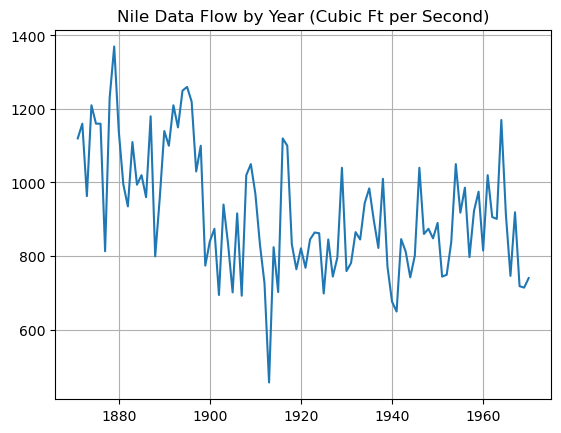

In [265]:
plt.plot(nile_data)
plt.grid()
plt.title('Nile Data Flow by Year (Cubic Ft per Second)')


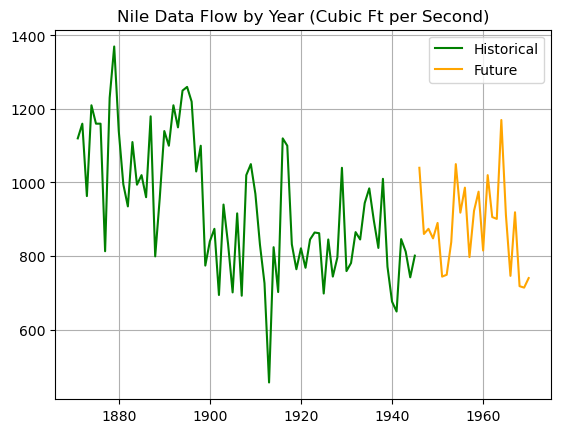

In [267]:
# Get Historical and Future data for training and testing the model
y_hist = nile_data.iloc[:75]
y_future = nile_data.iloc[75:]

plt.title('Nile Data Flow by Year (Cubic Ft per Second)')
plt.grid()
plt.plot(y_hist, color="green", label='Historical')
plt.plot(y_future, color="orange" , label='Future')
plt.legend()



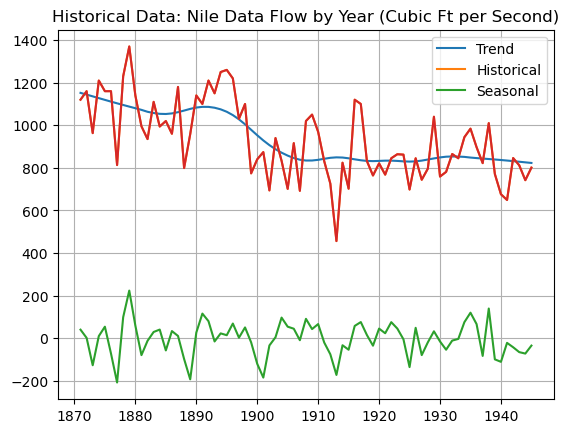

In [269]:
from statsmodels.tsa.seasonal import STL
#Let's use the STL framework to decompose this data in Trend, Seasaonlity and Residuals
stl = STL(X_train, period=12).fit()

plt.title('Historical Data: Nile Data Flow by Year (Cubic Ft per Second)')
plt.grid()
plt.plot(stl.trend , label='Trend')
plt.plot(y_hist , label='Historical')


plt.plot(stl.seasonal, label='Seasonal')
plt.plot(y_hist)
plt.legend()

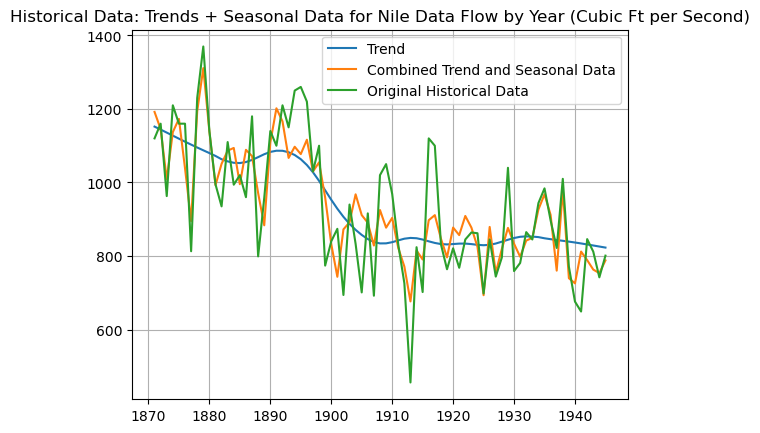

In [271]:
import numpy as np

# Let's visualize the combined season and trend data
trend_seasonal_combined_data = np.add (stl.trend, stl.seasonal)

plt.title('Historical Data: Trends + Seasonal Data for Nile Data Flow by Year (Cubic Ft per Second)')
plt.grid()
plt.plot(stl.trend , label='Trend')
plt.plot(trend_seasonal_combined_data , label='Combined Trend and Seasonal Data')


plt.plot(y_hist, label='Original Historical Data')
plt.legend()

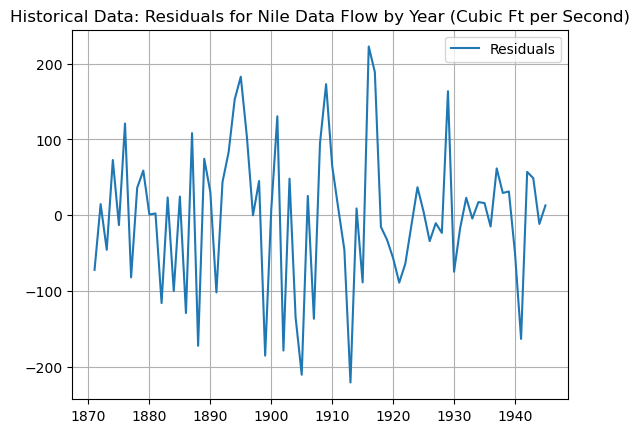

In [273]:
# Let's look at Residuals
plt.title('Historical Data: Residuals for Nile Data Flow by Year (Cubic Ft per Second)')
plt.grid()
plt.plot(stl.resid , label='Residuals')

plt.legend()

### Forecast the Flow using STLForecast Library
In this section, we will utilize the STLForecast class from the statsmodels library to forecast the future flow of the Nile River. The STLForecast class combines Seasonal-Trend decomposition using LOESS (STL) with a user-specified time series model to handle the deseasonalized data. This approach allows for effective modeling of complex seasonal patterns and trends in time series data. 

By decomposing the time series into its seasonal, trend, and residual components, we can apply models such as ARIMA to the deseasonalized data, leading to more accurate and insightful forecasts. This method is particularly useful for time series data exhibiting both trend and seasonality, as it enables separate modeling of these components.

We will demonstrate how to implement this forecasting technique using the STLForecast class, specifying an ARIMA model for the deseasonalized data, and discuss the results obtained from this approach.

In [278]:
#Let's forecast the flow
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(1, 1, 0), 'trend':"t"}, period=12)
stlf_results = stlf.fit()
forecast = stlf_results.forecast(len(y_future))

C:\Softwares\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Softwares\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Softwares\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


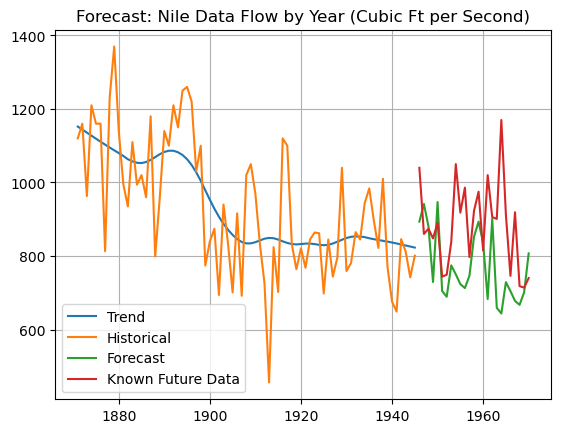

In [282]:
#Plot forecast

plt.title('Forecast: Nile Data Flow by Year (Cubic Ft per Second)')
plt.grid()
plt.plot(stl.trend , label='Trend')
plt.plot(y_hist , label='Historical')


plt.plot(forecast, label='Forecast')
plt.plot(y_future, label='Known Future Data')

plt.legend()

In [284]:
#Calculate the Mean Absolute Error and Root Mean Square Error
pred_error = y_future.value - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt((pred_error**2).mean())

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 130.79749319769982
RMSE: 181.2764124201898
